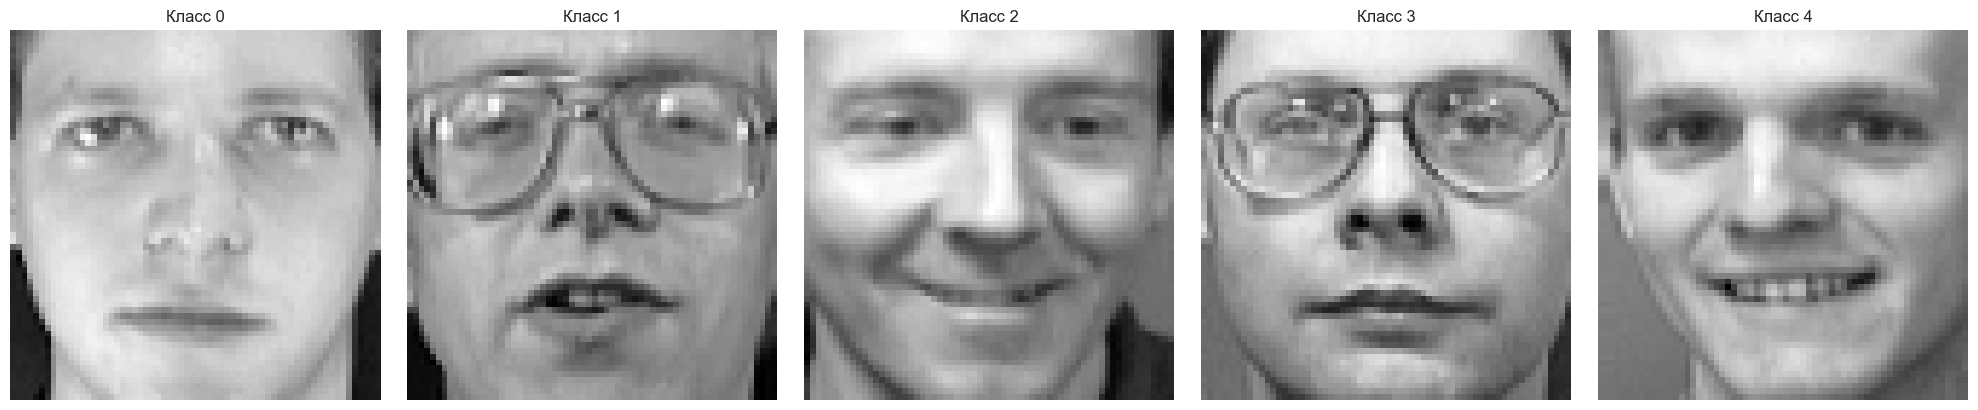

Шаг 1: Предобработка данных
Форма данных: (400, 4096)
Количество классов: 40
Диапазон значений: [0.00, 0.00]
Шаг 2: Разделение данных
Обучающая выборка: (300, 4096)
Тестовая выборка: (100, 4096)
Шаг 3: Создание моделей
Шаг 4: Обучение моделей

[1/2] LightGBM
Accuracy: 0.8000
Время обучения: 19.41s

[2/2] XGBoost
Accuracy: 0.7800
Время обучения: 31.34s
Шаг 5: Сравнение результатов

Алгоритм                    Accuracy     Время (сек)
----------------------------------------------------
LightGBM                      0.8000           19.41
XGBoost                       0.7800           31.34
Шаг 6: Отчёты классификации

--- LightGBM ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         3
           3       1.00      0.67      0.80         3
           4       0.50      1.00      0.67         2
           5       1.00      0.67

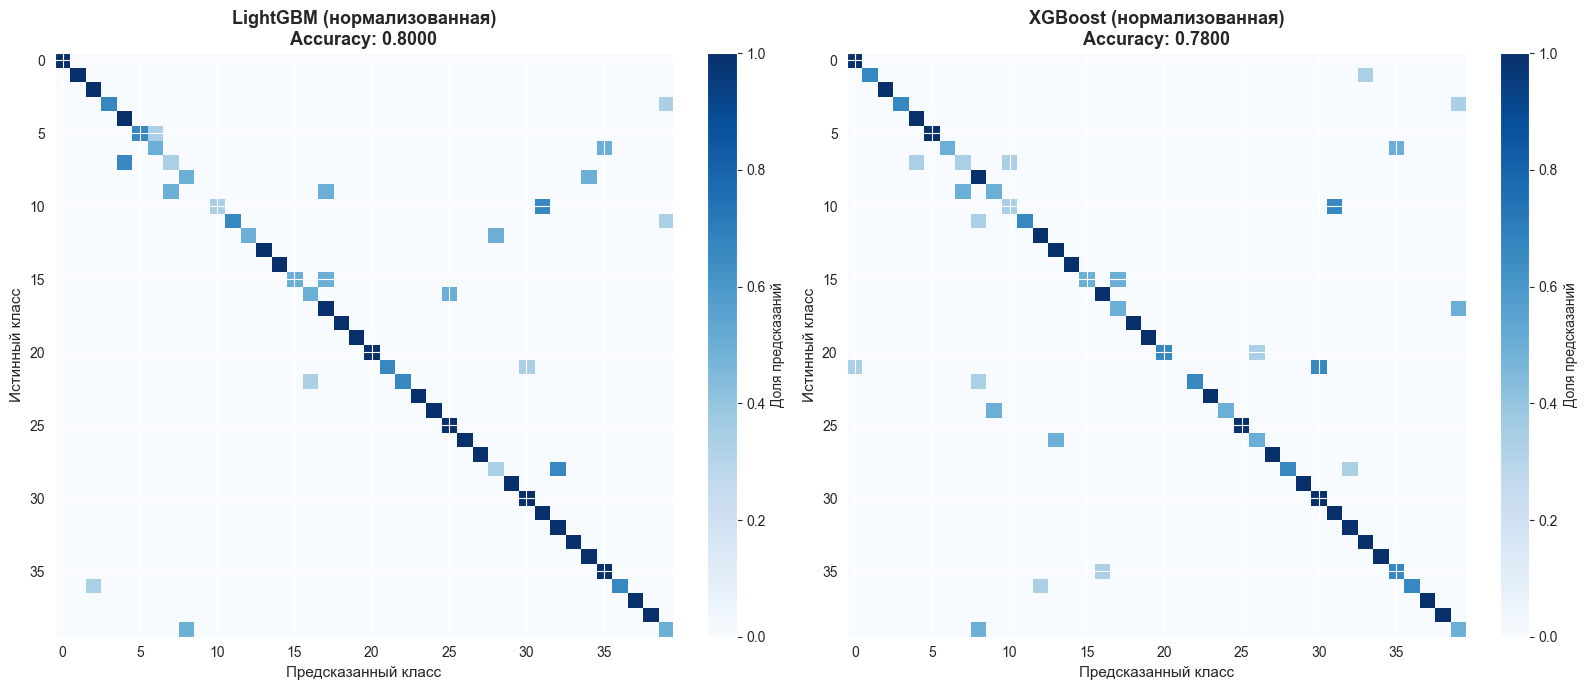

Примечание: Яркая диагональ = правильные предсказания
Чем ярче диагональ, тем лучше модель классифицирует


In [7]:
# Задание 1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[10*i]
    label = labels[10*i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import time
import warnings
warnings.filterwarnings('ignore')


print("Шаг 1: Предобработка данных")

# Преобразование изображений в векторы (flatten)
X = images.reshape(images.shape[0], -1)
# Нормализация (деление на 255)
X = X / 255.0
y = labels

print(f"Форма данных: {X.shape}")
print(f"Количество классов: {len(np.unique(y))}")
print(f"Диапазон значений: [{X.min():.2f}, {X.max():.2f}]")

# 2. Разделение на обучающую и тестовую выборки
print("Шаг 2: Разделение данных")


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# 3. Создание моделей градиентного бустинга
print("Шаг 3: Создание моделей")

lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    verbose=-1,
    force_col_wise=True
)

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='mlogloss',
    verbosity=0
)

# 4. Обучение и оценка моделей
print("Шаг 4: Обучение моделей")

# LightGBM
print("\n[1/2] LightGBM")
start = time.time()
lgbm.fit(X_train, y_train)
time_lgbm = time.time() - start
y_pred_lgbm = lgbm.predict(X_test)
acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy: {acc_lgbm:.4f}")
print(f"Время обучения: {time_lgbm:.2f}s")

# XGBoost
print("\n[2/2] XGBoost")
start = time.time()
xgb.fit(X_train, y_train)
time_xgb = time.time() - start
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {acc_xgb:.4f}")
print(f"Время обучения: {time_xgb:.2f}s")

# 5. Сравнительная таблица
print("Шаг 5: Сравнение результатов")


print(f"\n{'Алгоритм':<25} {'Accuracy':>10} {'Время (сек)':>15}")
print("-" * 52)
print(f"{'LightGBM':<25} {acc_lgbm:>10.4f} {time_lgbm:>15.2f}")
print(f"{'XGBoost':<25} {acc_xgb:>10.4f} {time_xgb:>15.2f}")

# 6. Отчёты классификации
print("Шаг 6: Отчёты классификации")

print("\n--- LightGBM ---")
print(classification_report(y_test, y_pred_lgbm, zero_division=0))

print("\n--- XGBoost ---")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# 7. Матрицы ошибок (улучшенная визуализация)
print("Шаг 7: Матрицы ошибок")

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Нормализация матриц
cm_lgbm_norm = cm_lgbm.astype('float') / (cm_lgbm.sum(axis=1, keepdims=True) + 1e-10)
cm_xgb_norm = cm_xgb.astype('float') / (cm_xgb.sum(axis=1, keepdims=True) + 1e-10)

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# LightGBM
im1 = axes[0].imshow(cm_lgbm_norm, cmap='Blues', aspect='auto', interpolation='nearest')
axes[0].set_title(f'LightGBM (нормализованная)\nAccuracy: {acc_lgbm:.4f}',
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Предсказанный класс', fontsize=11)
axes[0].set_ylabel('Истинный класс', fontsize=11)
axes[0].set_xticks(range(0, 40, 5))
axes[0].set_yticks(range(0, 40, 5))
plt.colorbar(im1, ax=axes[0], fraction=0.046, label='Доля предсказаний')

# XGBoost
im2 = axes[1].imshow(cm_xgb_norm, cmap='Blues', aspect='auto', interpolation='nearest')
axes[1].set_title(f'XGBoost (нормализованная)\nAccuracy: {acc_xgb:.4f}',
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Предсказанный класс', fontsize=11)
axes[1].set_ylabel('Истинный класс', fontsize=11)
axes[1].set_xticks(range(0, 40, 5))
axes[1].set_yticks(range(0, 40, 5))
plt.colorbar(im2, ax=axes[1], fraction=0.046, label='Доля предсказаний')

plt.tight_layout()
plt.show()

print("Примечание: Яркая диагональ = правильные предсказания")
print("Чем ярче диагональ, тем лучше модель классифицирует")

Шаг 1: Загрузка данных Olivetti Faces
Количество изображений: 400
Количество классов: 40
Шаг 2: Предобработка изображений
Train: (280, 4096), Test: (120, 4096)
Шаг 3: Создание базовых классификаторов

Шаг 4: Создание VotingClassifier
Шаг 5: Обучение моделей

[1/5] LogisticRegression
Время обучения: 0.02s

[2/5] DecisionTree
Время обучения: 0.97s

[3/5] KNN
Время обучения: 0.00s

[4/5] NaiveBayes
Время обучения: 0.00s

[5/5] VotingClassifier
Время обучения: 3.97s
Шаг 6: Результаты классификации

Модель                 Accuracy    Время (s)
---------------------------------------------
LogisticRegression       0.0250         0.02
DecisionTree             0.2083         0.97
KNN                      0.8333         0.00
NaiveBayes               0.8917         0.00
---------------------------------------------
VotingClassifier         0.9083         3.97
Шаг 7: Отчёты классификации

--- LogisticRegression ---
              precision    recall  f1-score   support

           0       0.03    

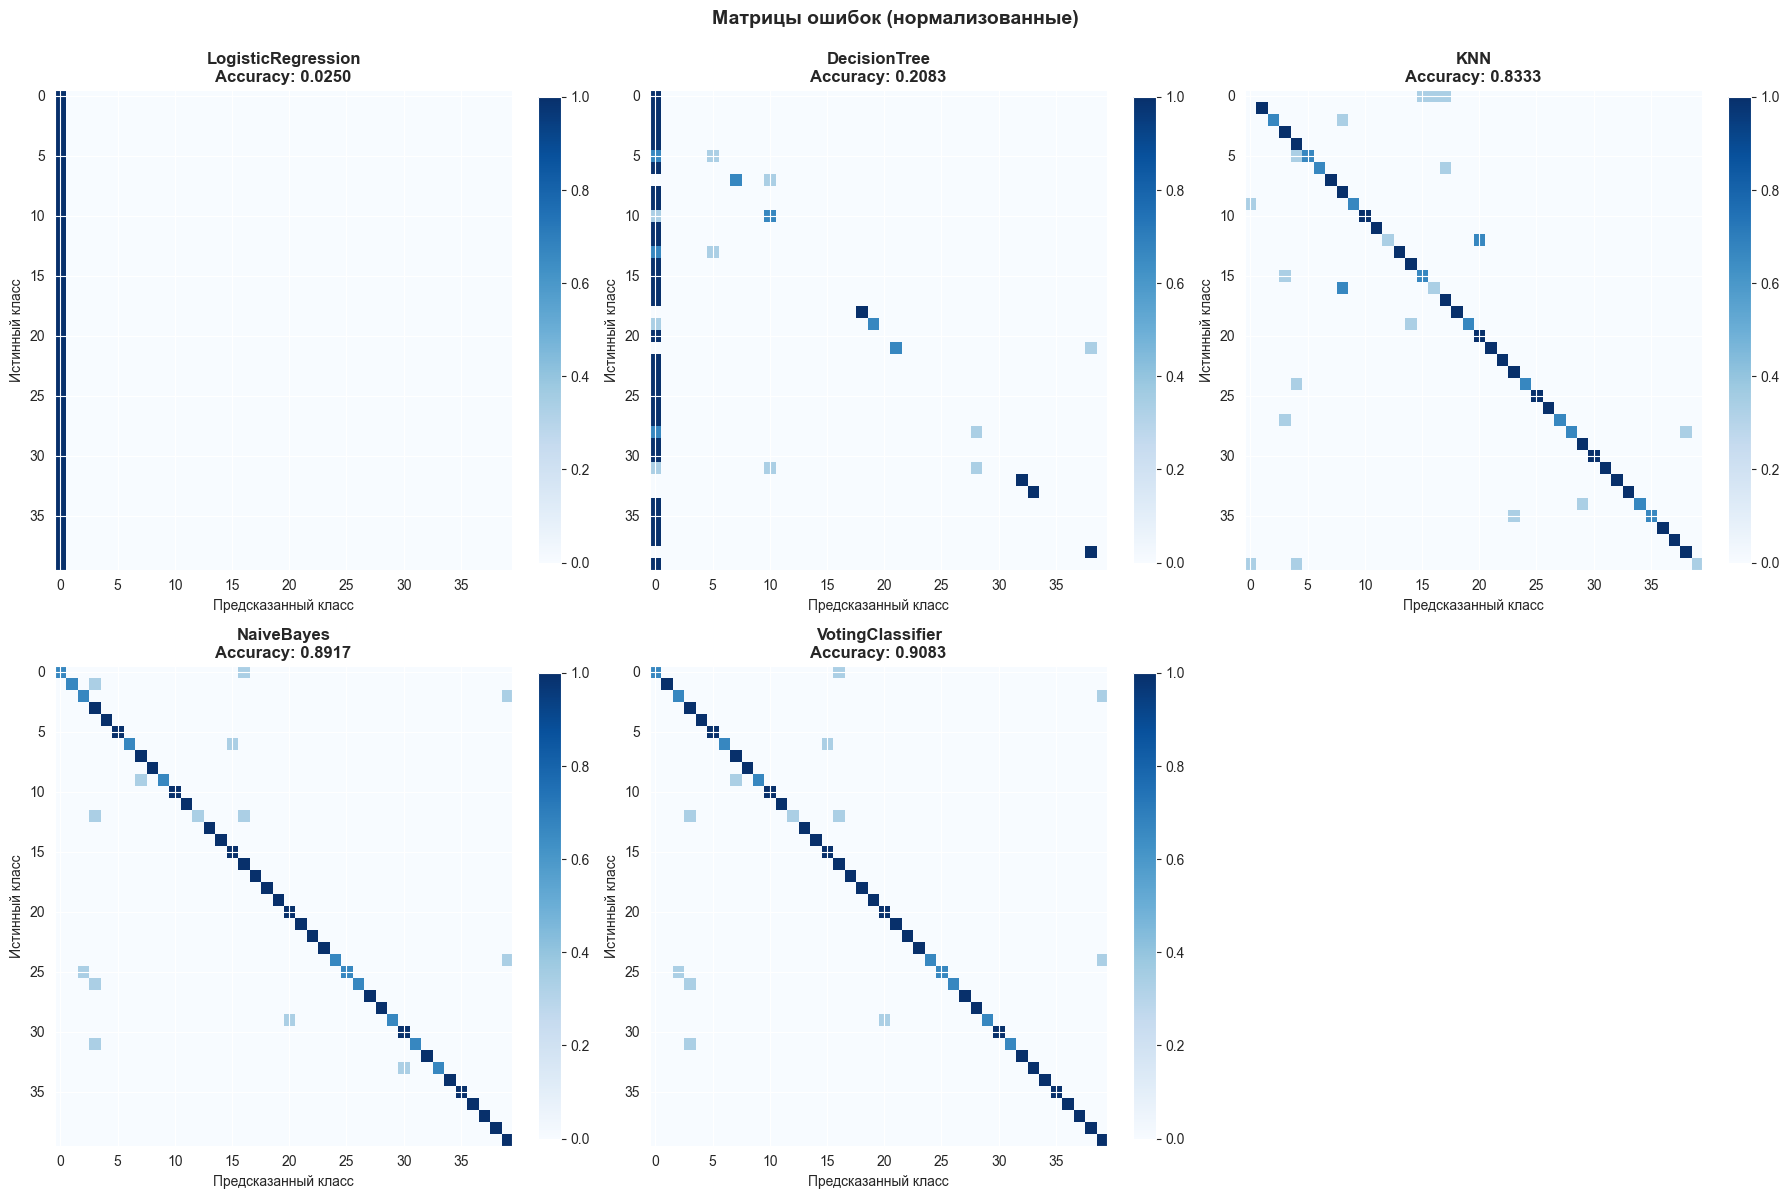

Примечание: Яркая диагональ = правильные предсказания


In [9]:
# ========================================
# Задание 2: VotingClassifier
# ========================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

# 1. Загрузка данных
print("Шаг 1: Загрузка данных Olivetti Faces")

faces = fetch_olivetti_faces(shuffle=True, random_state=42)
images = faces.images
labels = faces.target

print(f"Количество изображений: {images.shape[0]}")
print(f"Количество классов: {len(np.unique(labels))}")

# 2. Предобработка
print("Шаг 2: Предобработка изображений")
X = images.reshape(images.shape[0], -1)
X = X / 255.0
y = labels

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

# 3. Создание базовых классификаторов
print("Шаг 3: Создание базовых классификаторов")


lr = LogisticRegression(max_iter=500, random_state=42)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

estimators = [('lr', lr), ('dt', dt), ('knn', knn), ('nb', nb)]

# 4. Создание VotingClassifier
print("\n" + "="*60)
print("Шаг 4: Создание VotingClassifier")
print("="*60)

voting = VotingClassifier(
    estimators=estimators,
    voting='soft',
    n_jobs=-1
)

print("Шаг 5: Обучение моделей")


print("\n[1/5] LogisticRegression")
start = time.time()
lr.fit(X_train, y_train)
time_lr = time.time() - start
print(f"Время обучения: {time_lr:.2f}s")

print("\n[2/5] DecisionTree")
start = time.time()
dt.fit(X_train, y_train)
time_dt = time.time() - start
print(f"Время обучения: {time_dt:.2f}s")

print("\n[3/5] KNN")
start = time.time()
knn.fit(X_train, y_train)
time_knn = time.time() - start
print(f"Время обучения: {time_knn:.2f}s")

print("\n[4/5] NaiveBayes")
start = time.time()
nb.fit(X_train, y_train)
time_nb = time.time() - start
print(f"Время обучения: {time_nb:.2f}s")

print("\n[5/5] VotingClassifier")
start = time.time()
voting.fit(X_train, y_train)
time_voting = time.time() - start
print(f"Время обучения: {time_voting:.2f}s")

# 6. Предсказания и метрики
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_voting = voting.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_voting = accuracy_score(y_test, y_pred_voting)

# 7. Вывод результатов
print("Шаг 6: Результаты классификации")

print(f"\n{'Модель':<20} {'Accuracy':>10} {'Время (s)':>12}")
print("-" * 45)
print(f"{'LogisticRegression':<20} {acc_lr:>10.4f} {time_lr:>12.2f}")
print(f"{'DecisionTree':<20} {acc_dt:>10.4f} {time_dt:>12.2f}")
print(f"{'KNN':<20} {acc_knn:>10.4f} {time_knn:>12.2f}")
print(f"{'NaiveBayes':<20} {acc_nb:>10.4f} {time_nb:>12.2f}")
print("-" * 45)
print(f"{'VotingClassifier':<20} {acc_voting:>10.4f} {time_voting:>12.2f}")

# 8. Детальные отчёты

print("Шаг 7: Отчёты классификации")


print("\n--- LogisticRegression ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- DecisionTree ---")
print(classification_report(y_test, y_pred_dt, zero_division=0))

print("\n--- KNN ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

print("\n--- NaiveBayes ---")
print(classification_report(y_test, y_pred_nb, zero_division=0))

print("\n--- VotingClassifier ---")
print(classification_report(y_test, y_pred_voting, zero_division=0))

# 9. Матрицы ошибок (улучшенная визуализация)

print("Шаг 8: Построение матриц ошибок")


models = [
    ('LogisticRegression', y_pred_lr, acc_lr),
    ('DecisionTree', y_pred_dt, acc_dt),
    ('KNN', y_pred_knn, acc_knn),
    ('NaiveBayes', y_pred_nb, acc_nb),
    ('VotingClassifier', y_pred_voting, acc_voting)
]

# Создаём нормализованные матрицы
cms_norm = []
for name, y_pred, acc in models:
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-10)
    cms_norm.append((name, cm_norm, acc))

# Визуализация
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (name, cm_norm, acc) in enumerate(cms_norm):
    im = axes[idx].imshow(cm_norm, cmap='Blues', aspect='auto', interpolation='nearest')
    axes[idx].set_title(f'{name}\nAccuracy: {acc:.4f}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Предсказанный класс', fontsize=10)
    axes[idx].set_ylabel('Истинный класс', fontsize=10)
    axes[idx].set_xticks(range(0, 40, 5))
    axes[idx].set_yticks(range(0, 40, 5))
    plt.colorbar(im, ax=axes[idx], fraction=0.046)

# Убираем лишнюю ячейку
axes[-1].axis('off')

plt.suptitle('Матрицы ошибок (нормализованные)', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("Примечание: Яркая диагональ = правильные предсказания")



best_base = max([(acc_lr, 'LogisticRegression'),
                 (acc_dt, 'DecisionTree'),
                 (acc_knn, 'KNN'),
                 (acc_nb, 'NaiveBayes')], key=lambda x: x[0])

improvement = (acc_voting - best_base[0]) * 100


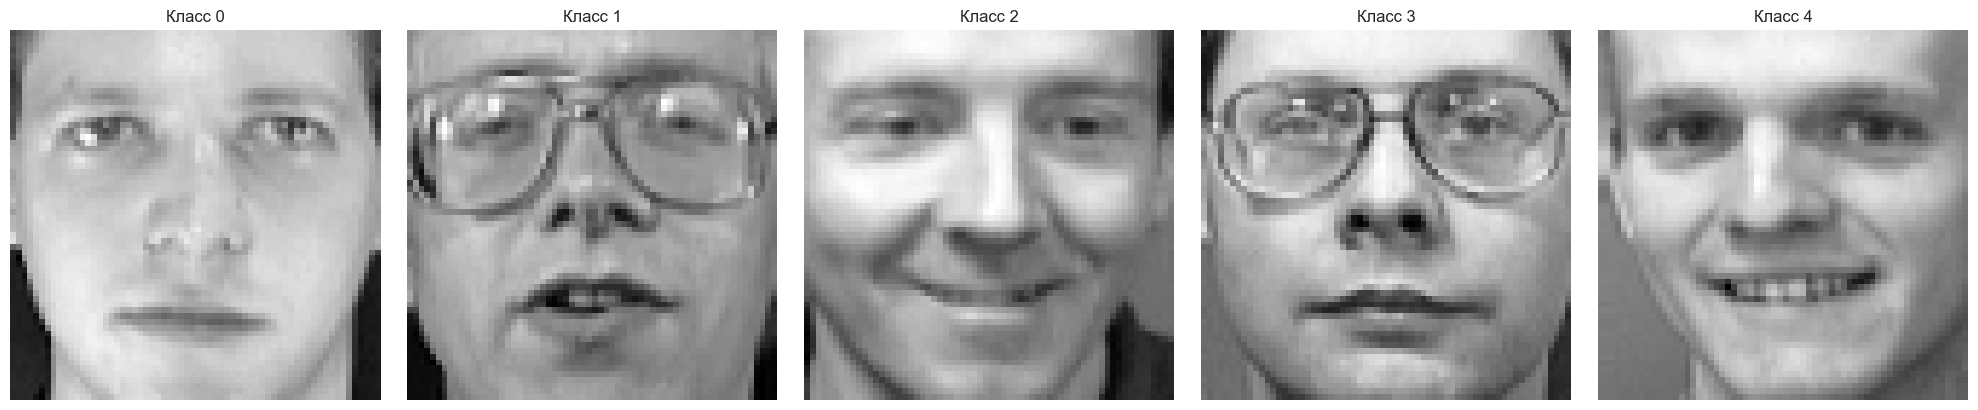

Шаг 1: Предобработка данных
Форма данных: (400, 4096)
Количество классов: 40
Диапазон значений: [0.00, 0.00]
Шаг 2: Разделение данных
Обучающая выборка: (280, 4096)
Тестовая выборка: (120, 4096)
Шаг 3: Создание базовых классификаторов
Базовые классификаторы:
  - lr
  - dt
  - knn
  - nb
Шаг 4: Создание StackingClassifier (Level 1)
Мета-классификатор: LogisticRegression
Cross-validation: 5-fold
Шаг 5: Обучение моделей

[1/5] LogisticRegression
Время обучения: 0.02s

[2/5] DecisionTree
Время обучения: 0.98s

[3/5] KNN
Время обучения: 0.00s

[4/5] NaiveBayes
Время обучения: 0.01s

[5/5] StackingClassifier
Время обучения: 4.51s
Шаг 6: Результаты классификации

Модель                 Accuracy    Время (s)
---------------------------------------------
LogisticRegression       0.0250         0.02
DecisionTree             0.2083         0.98
KNN                      0.8250         0.00
NaiveBayes               0.8167         0.01
---------------------------------------------
StackingClassifier

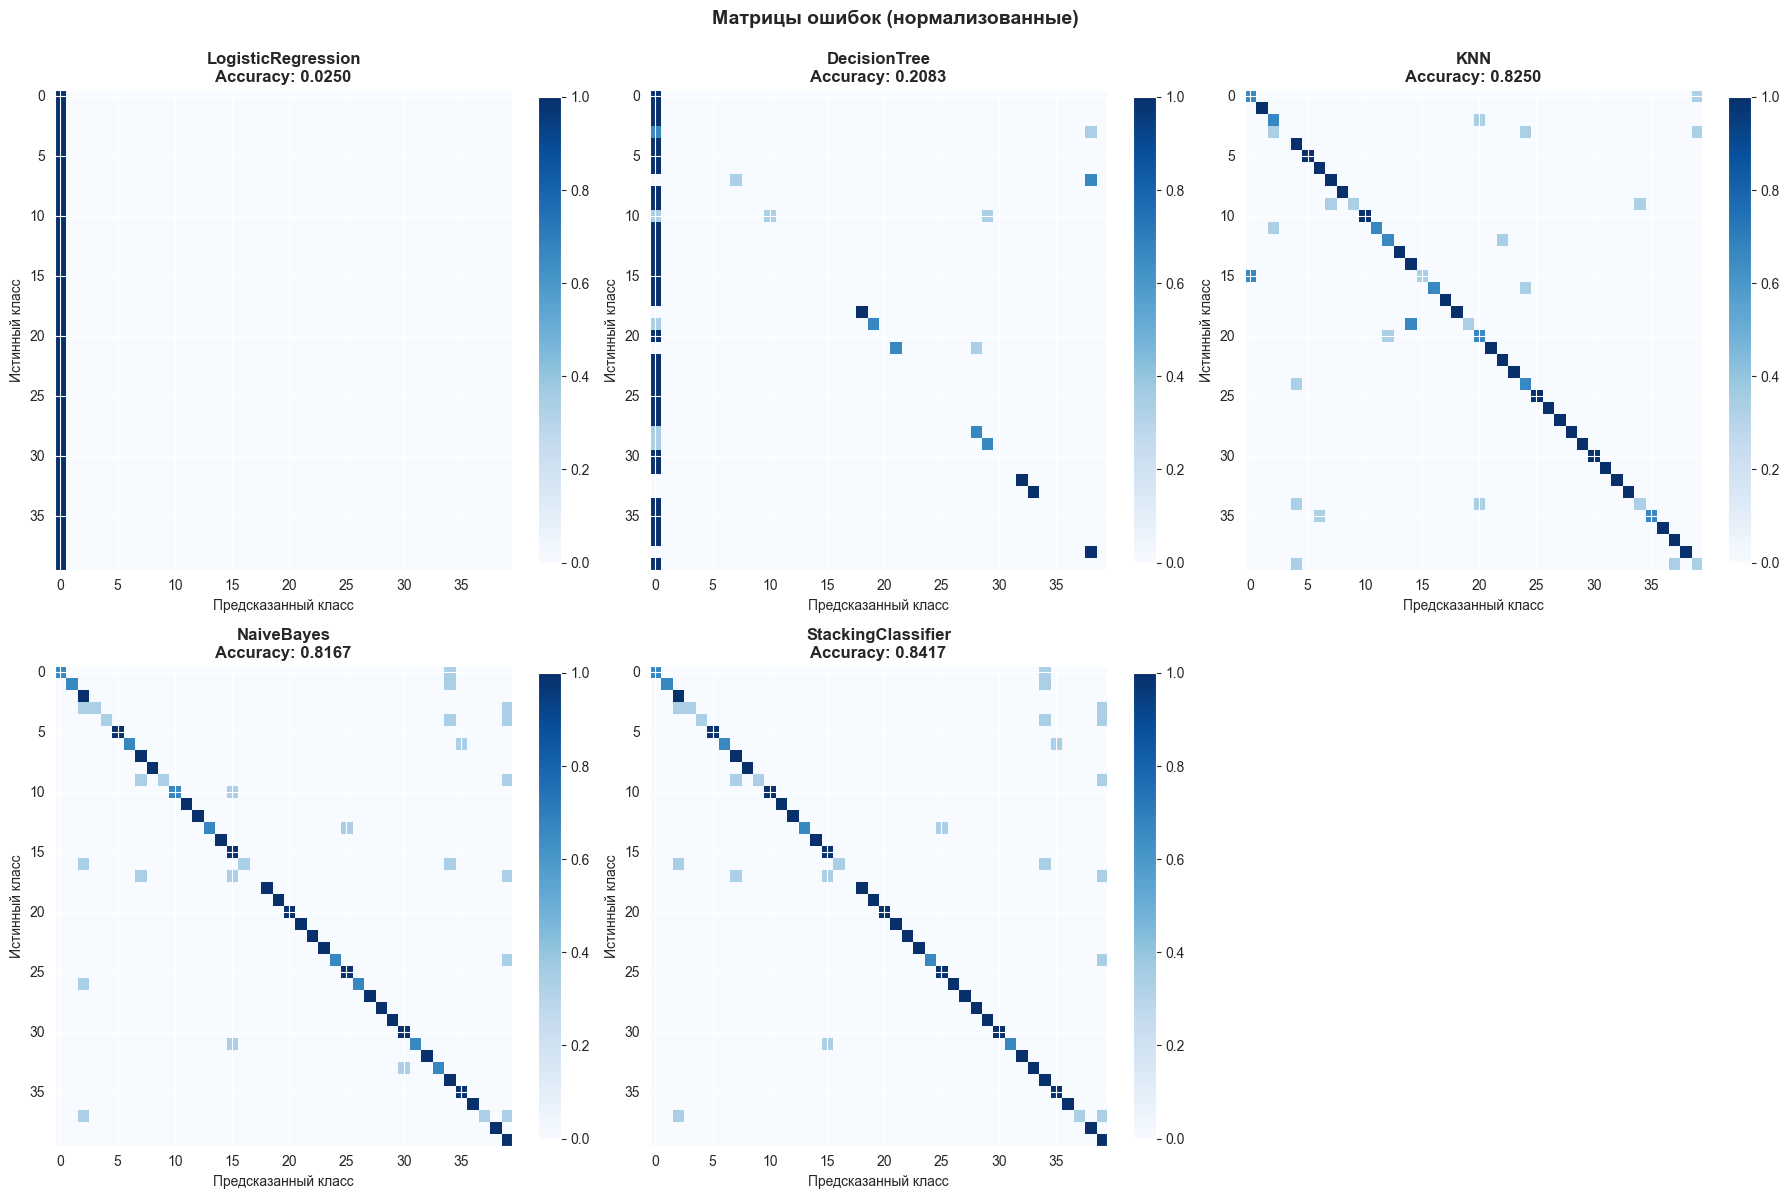

Примечание: Яркая диагональ = правильные предсказания

ВЫВОДЫ

1. РЕЗУЛЬТАТЫ БАЗОВЫХ МОДЕЛЕЙ:
   - LogisticRegression: 0.0250
   - DecisionTree: 0.2083
   - KNN: 0.8250
   - NaiveBayes: 0.8167

2. РЕЗУЛЬТАТ АНСАМБЛИРОВАНИЯ:
   - Лучшая базовая модель: KNN (0.8250)
   - StackingClassifier: 0.8417
   - Изменение: +1.67%

3. ПРИНЦИП РАБОТЫ STACKING:
   - Базовые модели (Level 0) обучаются на исходных данных
   - Мета-классификатор (Level 1) обучается на предсказаниях базовых моделей
   - Используется cross-validation для избежания переобучения
   - Мета-классификатор учится оптимально комбинировать предсказания

4. STACKING vs VOTING:
   - Stacking: мета-модель "учится" комбинировать предсказания
   - Voting: простое усреднение или голосование
   - Stacking обычно точнее, но требует больше времени на обучение

5. АНАЛИЗ РЕЗУЛЬТАТОВ:
   - Stacking превосходит лучшую базовую модель
   - Время обучения больше из-за cross-validation
   - Эффективен когда базовые модели имеют разные сильные ст

In [19]:
# Задание 3: StackingClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[10*i]
    label = labels[10*i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

print("Шаг 1: Предобработка данных")

# Преобразование изображений в векторы (flatten)
X = images.reshape(images.shape[0], -1)
# Нормализация (деление на 255)
X = X / 255.0
y = labels

print(f"Форма данных: {X.shape}")
print(f"Количество классов: {len(np.unique(y))}")
print(f"Диапазон значений: [{X.min():.2f}, {X.max():.2f}]")

# 2. Разделение на обучающую и тестовую выборки
print("Шаг 2: Разделение данных")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")

# 3. Создание базовых классификаторов
print("Шаг 3: Создание базовых классификаторов")

lr = LogisticRegression(max_iter=500, random_state=42)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()

estimators = [
    ('lr', lr),
    ('dt', dt),
    ('knn', knn),
    ('nb', nb)
]

print("Базовые классификаторы:")
for name, _ in estimators:
    print(f"  - {name}")

# 4. Создание StackingClassifier
print("Шаг 4: Создание StackingClassifier (Level 1)")

# Мета-классификатор (финальный классификатор)
final_estimator = LogisticRegression(max_iter=500, random_state=42)

stacking = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1
)

print(f"Мета-классификатор: LogisticRegression")
print(f"Cross-validation: 5-fold")

print("Шаг 5: Обучение моделей")

print("\n[1/5] LogisticRegression")
start = time.time()
lr.fit(X_train, y_train)
time_lr = time.time() - start
print(f"Время обучения: {time_lr:.2f}s")

print("\n[2/5] DecisionTree")
start = time.time()
dt.fit(X_train, y_train)
time_dt = time.time() - start
print(f"Время обучения: {time_dt:.2f}s")

print("\n[3/5] KNN")
start = time.time()
knn.fit(X_train, y_train)
time_knn = time.time() - start
print(f"Время обучения: {time_knn:.2f}s")

print("\n[4/5] NaiveBayes")
start = time.time()
nb.fit(X_train, y_train)
time_nb = time.time() - start
print(f"Время обучения: {time_nb:.2f}s")

print("\n[5/5] StackingClassifier")
start = time.time()
stacking.fit(X_train, y_train)
time_stacking = time.time() - start
print(f"Время обучения: {time_stacking:.2f}s")

# 6. Предсказания и метрики
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_stacking = stacking.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_nb = accuracy_score(y_test, y_pred_nb)
acc_stacking = accuracy_score(y_test, y_pred_stacking)

# 7. Вывод результатов
print("Шаг 6: Результаты классификации")

print(f"\n{'Модель':<20} {'Accuracy':>10} {'Время (s)':>12}")
print("-" * 45)
print(f"{'LogisticRegression':<20} {acc_lr:>10.4f} {time_lr:>12.2f}")
print(f"{'DecisionTree':<20} {acc_dt:>10.4f} {time_dt:>12.2f}")
print(f"{'KNN':<20} {acc_knn:>10.4f} {time_knn:>12.2f}")
print(f"{'NaiveBayes':<20} {acc_nb:>10.4f} {time_nb:>12.2f}")
print("-" * 45)
print(f"{'StackingClassifier':<20} {acc_stacking:>10.4f} {time_stacking:>12.2f}")

# 8. Детальные отчёты
print("\n" + "="*60)
print("Шаг 7: Детальные отчёты классификации")
print("="*60)

print("\n--- LogisticRegression ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- DecisionTree ---")
print(classification_report(y_test, y_pred_dt, zero_division=0))

print("\n--- KNN ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

print("\n--- NaiveBayes ---")
print(classification_report(y_test, y_pred_nb, zero_division=0))

print("\n--- StackingClassifier ---")
print(classification_report(y_test, y_pred_stacking, zero_division=0))


print("Шаг 8: Построение матриц ошибок")


models = [
    ('LogisticRegression', y_pred_lr, acc_lr),
    ('DecisionTree', y_pred_dt, acc_dt),
    ('KNN', y_pred_knn, acc_knn),
    ('NaiveBayes', y_pred_nb, acc_nb),
    ('StackingClassifier', y_pred_stacking, acc_stacking)
]

# Создаём нормализованные матрицы
cms_norm = []
for name, y_pred, acc in models:
    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm.astype('float') / (cm.sum(axis=1, keepdims=True) + 1e-10)
    cms_norm.append((name, cm_norm, acc))

# Визуализация
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (name, cm_norm, acc) in enumerate(cms_norm):
    im = axes[idx].imshow(cm_norm, cmap='Blues', aspect='auto', interpolation='nearest')
    axes[idx].set_title(f'{name}\nAccuracy: {acc:.4f}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Предсказанный класс', fontsize=10)
    axes[idx].set_ylabel('Истинный класс', fontsize=10)
    axes[idx].set_xticks(range(0, 40, 5))
    axes[idx].set_yticks(range(0, 40, 5))
    plt.colorbar(im, ax=axes[idx], fraction=0.046)

# Убираем лишнюю ячейку
axes[-1].axis('off')

plt.suptitle('Матрицы ошибок (нормализованные)', fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

print("Примечание: Яркая диагональ = правильные предсказания")

# 10. Выводы
print("\n" + "="*60)
print("ВЫВОДЫ")
print("="*60)

best_base = max([(acc_lr, 'LogisticRegression'),
                 (acc_dt, 'DecisionTree'),
                 (acc_knn, 'KNN'),
                 (acc_nb, 'NaiveBayes')], key=lambda x: x[0])

improvement = (acc_stacking - best_base[0]) * 100

print(f"""
1. РЕЗУЛЬТАТЫ БАЗОВЫХ МОДЕЛЕЙ:
   - LogisticRegression: {acc_lr:.4f}
   - DecisionTree: {acc_dt:.4f}
   - KNN: {acc_knn:.4f}
   - NaiveBayes: {acc_nb:.4f}

2. РЕЗУЛЬТАТ АНСАМБЛИРОВАНИЯ:
   - Лучшая базовая модель: {best_base[1]} ({best_base[0]:.4f})
   - StackingClassifier: {acc_stacking:.4f}
   - Изменение: {improvement:+.2f}%

3. ПРИНЦИП РАБОТЫ STACKING:
   - Базовые модели (Level 0) обучаются на исходных данных
   - Мета-классификатор (Level 1) обучается на предсказаниях базовых моделей
   - Используется cross-validation для избежания переобучения
   - Мета-классификатор учится оптимально комбинировать предсказания

4. STACKING vs VOTING:
   - Stacking: мета-модель "учится" комбинировать предсказания
   - Voting: простое усреднение или голосование
   - Stacking обычно точнее, но требует больше времени на обучение

5. АНАЛИЗ РЕЗУЛЬТАТОВ:
   - Stacking {'превосходит' if acc_stacking > best_base[0] else 'не превосходит'} лучшую базовую модель
   - Время обучения больше из-за cross-validation
   - Эффективен когда базовые модели имеют разные сильные стороны

6. РЕКОМЕНДАЦИИ:
   - Stacking хорош для финальной модели после настройки
   - Требует достаточно данных для обучения мета-классификатора
   - Можно экспериментировать с разными мета-классификаторами (LR, SVC, RF)
""")